In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [4]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [8]:
from pycaret.classification import *

In [9]:
s = setup(df, target = 'NObeyesdad', session_id = 44)

,Description,Value
0,Session id,44
1,Target,NObeyesdad
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(2111, 17)"
5,Transformed data shape,"(2111, 27)"
6,Transformed train set shape,"(1477, 27)"
7,Transformed test set shape,"(634, 27)"
8,Ordinal features,5
9,Numeric features,8


In [10]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9702,0.9989,0.9702,0.9716,0.9701,0.9652,0.9655,1.3850
catboost,CatBoost Classifier,0.9641,0.9990,0.9641,0.9661,0.9641,0.9581,0.9584,6.0500
gbc,Gradient Boosting Classifier,0.9634,0.9973,0.9634,0.9650,0.9633,0.9573,0.9576,1.9780
xgboost,Extreme Gradient Boosting,0.9628,0.9987,0.9628,0.9646,0.9627,0.9565,0.9568,0.8640
rf,Random Forest Classifier,0.9478,0.9961,0.9478,0.9524,0.9484,0.9391,0.9397,0.5950
dt,Decision Tree Classifier,0.9404,0.9652,0.9404,0.9432,0.9402,0.9303,0.9309,0.2260
et,Extra Trees Classifier,0.9215,0.9927,0.9215,0.9253,0.9218,0.9083,0.9088,0.5750
lda,Linear Discriminant Analysis,0.8883,0.9880,0.8883,0.8940,0.8866,0.8695,0.8709,0.2570
knn,K Neighbors Classifier,0.8598,0.9746,0.8598,0.8632,0.8522,0.8362,0.8389,0.2390
lr,Logistic Regression,0.7996,0.9671,0.7996,0.7982,0.7932,0.7658,0.7676,1.7690


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

####  we can clearly see light gradient boosting will give better accuracy on this model

In [11]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [12]:
df.duplicated().sum()

24

In [14]:
df.drop_duplicates(inplace = True)

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(2087, 17)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

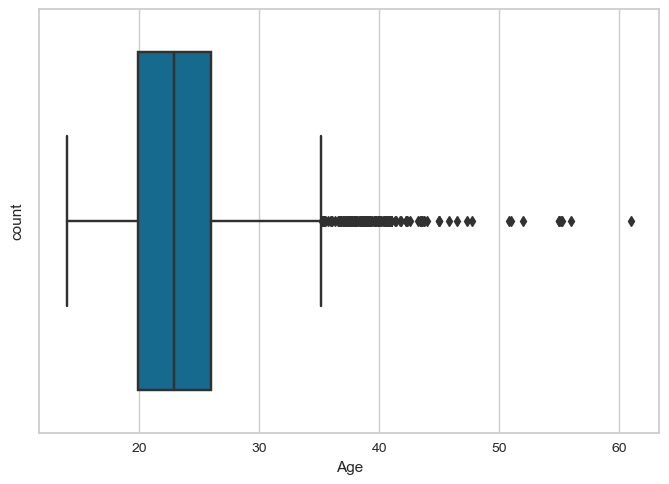

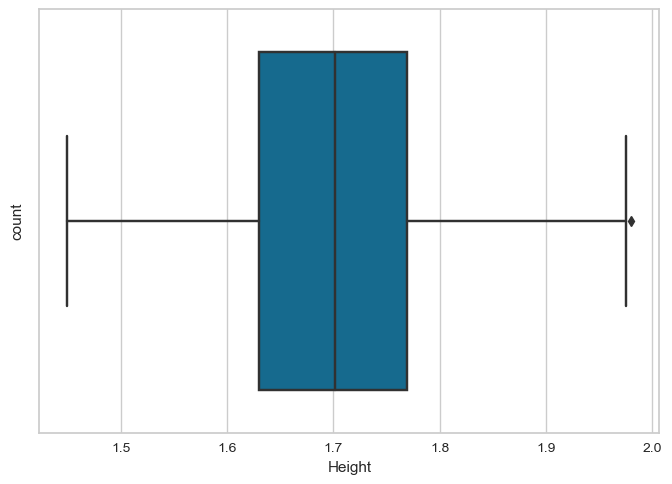

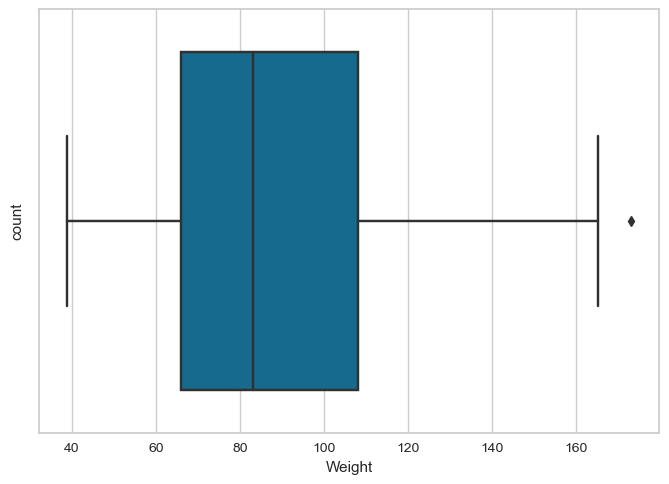

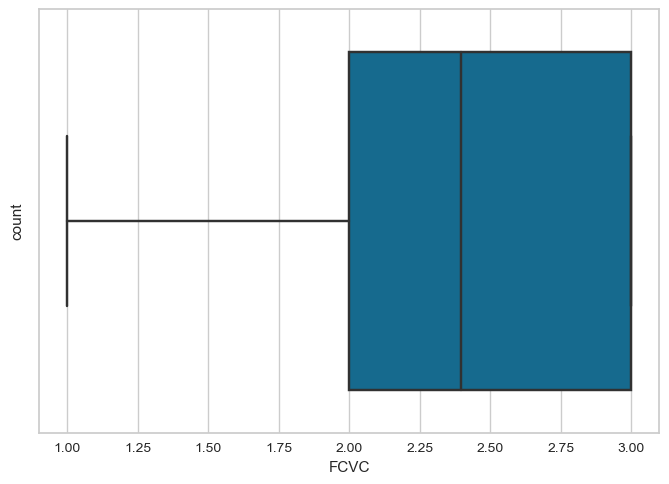

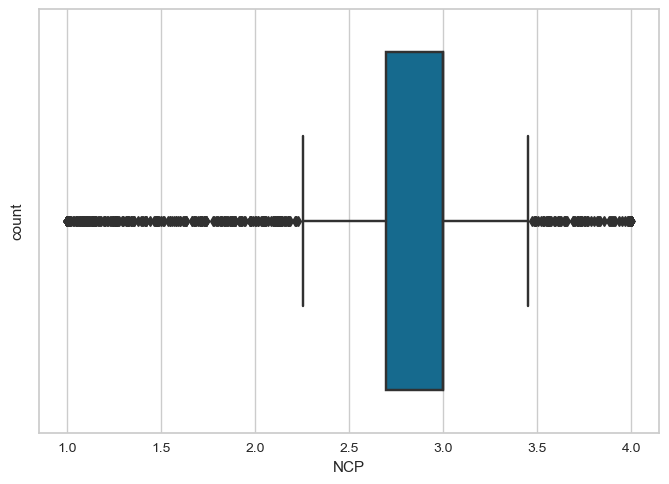

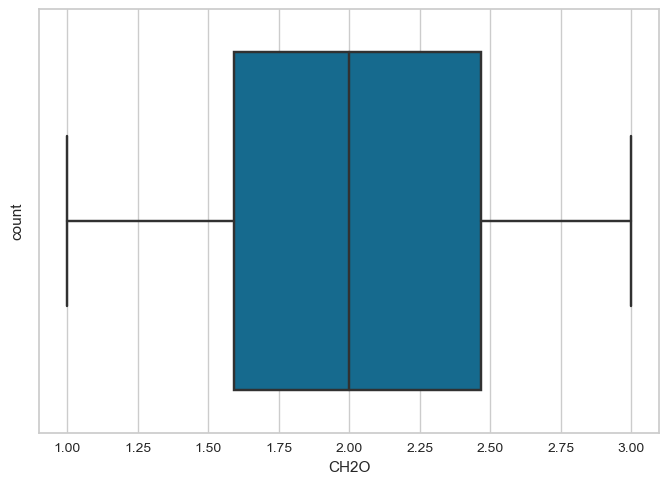

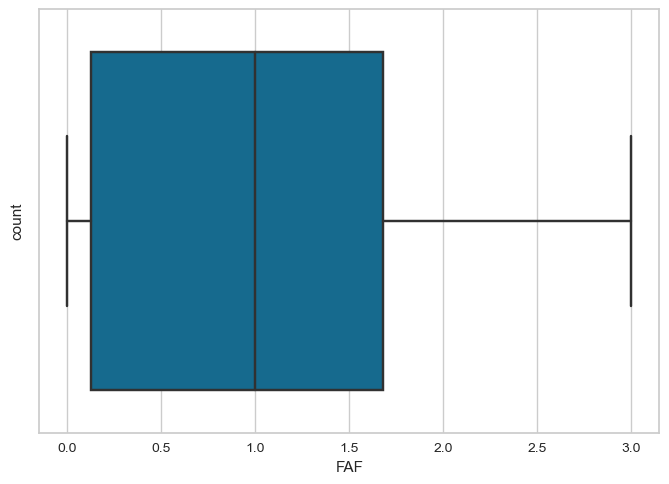

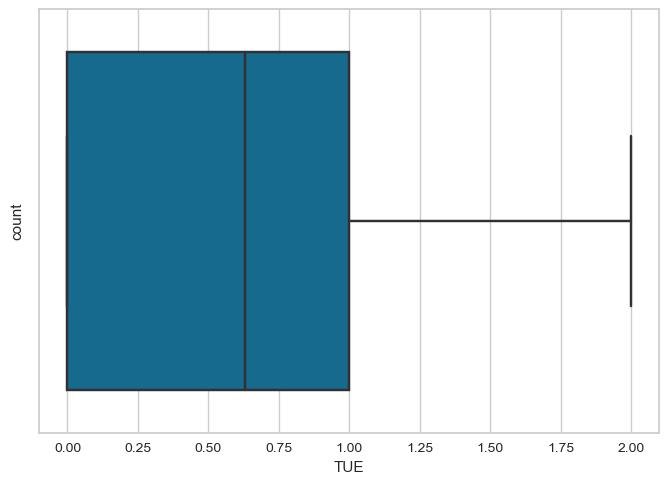

In [20]:
for col in df.columns:
    if df[col].dtypes == int or df[col].dtypes == float:
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

In [21]:
for col in df.columns:
    if df[col].dtypes == int or df[col].dtypes == float:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[col]>= Q1-1.5*IQR) & (df[col]<= Q3 + 1.5*IQR)]

In [22]:
df.shape

(1376, 17)

In [23]:
2087 - 1376

711

In [25]:
# we lost 711 records after removing outliers, we should move with capping method

In [26]:
df.NObeyesdad.value_counts()

Obesity_Type_III       324
Obesity_Type_II        212
Normal_Weight          196
Obesity_Type_I         194
Overweight_Level_II    165
Overweight_Level_I     148
Insufficient_Weight    137
Name: NObeyesdad, dtype: int64

In [32]:
x = df.drop('NObeyesdad', axis = 1)
x

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,2,3
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,1,3
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,0,3
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,0,4
5,1,29.000000,1.620000,53.000000,0,1,2.0,3.0,2,0,2.000000,0,0.000000,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,1,3
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,1,3
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,1,3
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,1,3


In [33]:
y = df['NObeyesdad']
y

0       1
1       1
2       1
3       5
5       1
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: NObeyesdad, Length: 1376, dtype: int32

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col])

In [30]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,2,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,1,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,0,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,0,4,5
5,1,29.000000,1.620000,53.000000,0,1,2.0,3.0,2,0,2.000000,0,0.000000,0.000000,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,1,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,1,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,1,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,1,3,4


In [34]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x = sc.fit_transform(x)

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 10)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(x_train, y_train )
y_pred = lr.predict(x_test)
lr_accs = accuracy_score(y_pred, y_test)
print(lr_accs)

0.8575581395348837


In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
dt_accs = accuracy_score(y_test, y_pred)
print(dt_accs)

0.9302325581395349


In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
rf_accs = accuracy_score(y_test, y_pred)
print(rf_accs)

0.9505813953488372


In [39]:
from sklearn.ensemble import ExtraTreesClassifier

et=ExtraTreesClassifier(n_estimators=100, max_features=10, random_state=42)
et.fit(x_train,y_train)
y_pred=et.predict(x_test)

accuracy_score(y_test,y_pred)

0.9622093023255814

In [40]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=100)
abc.fit(x_train,y_train)
y_pred=abc.predict(x_test)

accuracy_score(y_test,y_pred)

0.2558139534883721

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)
accuracy_score(y_test, y_pred)

0.9447674418604651

In [42]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

accuracy_score(y_test, y_pred)

0.9651162790697675

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
classifiers = [
    (RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}),
    (GradientBoostingClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}),
    (XGBClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}),
    (AdaBoostClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}),
    (ExtraTreesClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]})
]

In [45]:
best_models = {}

for clf, param_grid in classifiers:
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    best_models[str(best_model)] = accuracy

In [46]:
for model, accuracy in best_models.items():
    print(f"{model} - Accuracy: {accuracy:.4f}")

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False) - Accuracy: 0.9477
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=200, n_iter_no_change=None,
                           random_state=

In [51]:
import lightgbm as lgb

from lightgbm import LGBMClassifier

model = LGBMClassifier()
model.fit(x_train, y_train)

pred = model.predict(x_test)

accuracy = model.score(x_test, y_test)
accuracy

0.9709302325581395